In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data= pd.read_csv('survey_results_public2017.csv')

## How the situation of developers differ across different countries?

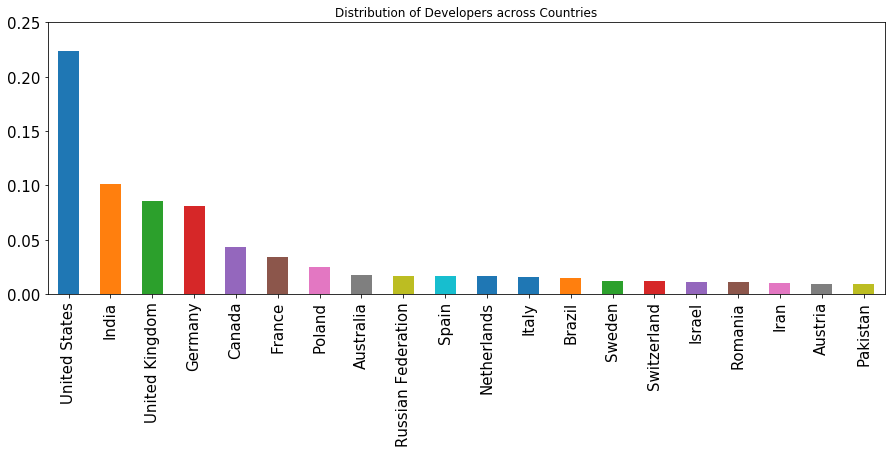

In [4]:
df=data[data['Country']!='I prefer not to say']
df_country_dist=df['Country'].value_counts()/df.shape[0]
ax=df_country_dist[0:20].plot(kind='bar',figsize=(15,5),ylim=[0,0.25],fontsize=15,title='Distribution of Developers across Countries')

In [5]:
#calculate average salary, jobsatisfaction and percentage of female deveoplers over the world
avg_salary=df['Salary'].mean(axis=0)
avg_job_satisfaction=df['JobSatisfaction'].mean(axis=0)
df_gender=df[df['Gender'].isin(['Female','Male'])]
gender_map={'Female':1,'Male':0}
df_gender['FemaleDeveloper']=df_gender['Gender'].map(gender_map)
avg_female=df_gender['FemaleDeveloper'].mean(axis=0)

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Average salary and expected salary across countries

Text(15,60000,'Average Salary')

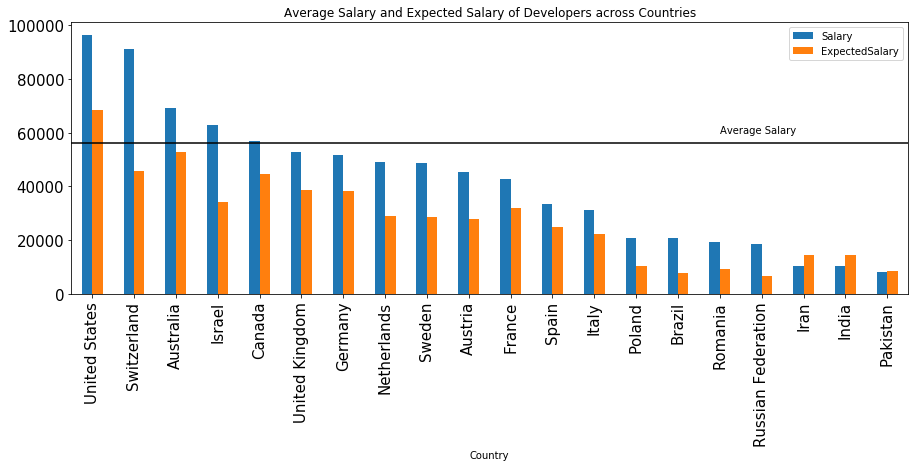

In [6]:
top20_country=list(df_country_dist[0:20].index)
df_top20=df[df['Country'].isin(top20_country)]
df_salary=df_top20.groupby(['Country']).agg({'Salary':'mean','ExpectedSalary':'mean'}).sort_values('Salary',ascending=False)

ax=df_salary.plot(kind='bar',figsize=(15,5),fontsize=15,title='Average Salary and Expected Salary of Developers across Countries')
ax.hlines(y=avg_salary,xmin=-1,xmax=20)
ax.text(15,60000,'Average Salary')

### Average JobSatisfaction across countries

Text(17.5,7.1,'Average Job Satisfaction')

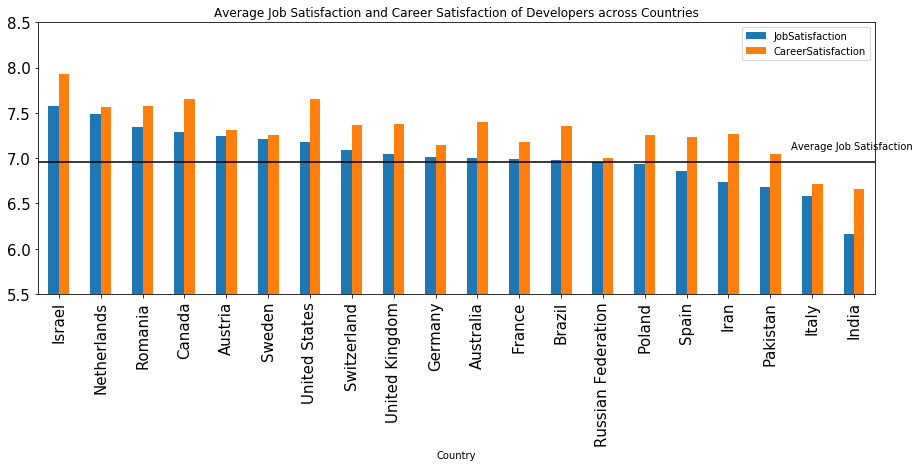

In [7]:
df_satisfaction=df_top20.groupby(['Country']).agg({'JobSatisfaction':'mean','CareerSatisfaction':'mean'}).sort_values('JobSatisfaction',ascending=False)
ax=df_satisfaction.plot(kind='bar',figsize=(15,5),fontsize=15,ylim=(5.5,8.5),title='Average Job Satisfaction and Career Satisfaction of Developers across Countries')
ax.hlines(y=avg_job_satisfaction,xmin=-1,xmax=20)
ax.text(17.5,7.1,'Average Job Satisfaction')

### Percentage of Female Developers across Countries

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(13,0.08,'Average Percentage of Female Developers')

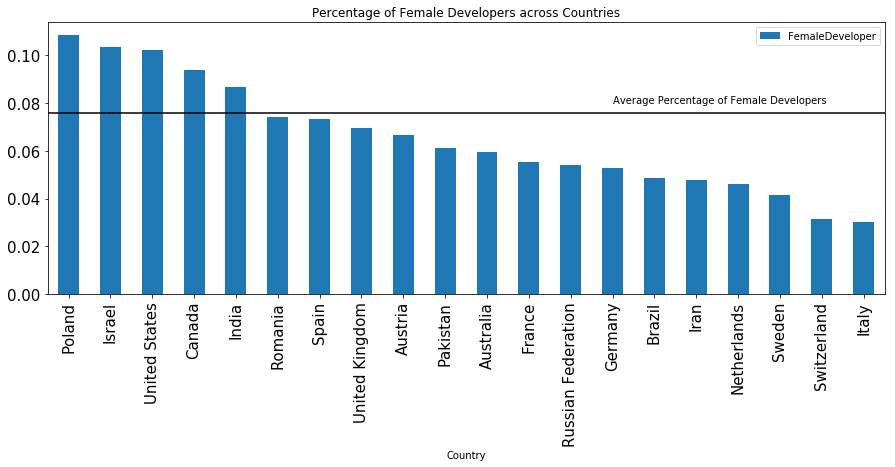

In [9]:
df_top20_gender=df_top20[df_top20['Gender'].isin(['Female','Male'])]
df_top20_gender['FemaleDeveloper']=df_top20_gender['Gender'].map(gender_map)
df_top20_gender_dist=df_top20_gender.groupby(['Country']).agg({'FemaleDeveloper':'mean'}).sort_values('FemaleDeveloper',ascending=False)
ax=df_top20_gender_dist.plot(kind='bar',figsize=(15,5),fontsize=15,title='Percentage of Female Developers across Countries')
ax.hlines(y=avg_female,xmin=-1,xmax=20)
ax.text(13,0.08,'Average Percentage of Female Developers')